In [2]:
# Establecer conexion 
import openeo
#nos contectamos a la plataforma
connection = openeo.connect("https://openeo.dataspace.copernicus.eu").authenticate_oidc()
print(connection.list_collections())
print("conexion exitosa")
print(f"conectado a {connection.authenticate_oidc_client_credentials} ")    

Authenticated using refresh token.
[{'description': 'Sentinel 3 imagery captured by OLCI sensor', 'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]}, 'temporal': {'interval': [['2016-04-17T11:33:13Z', None]]}}, 'id': 'SENTINEL3_OLCI_L1B', 'license': 'proprietary', 'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/', 'rel': 'root', 'type': 'application/json'}, {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci', 'rel': 'self', 'type': 'application/json'}, {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections', 'rel': 'parent', 'type': 'application/json'}, {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci/queryables', 'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables', 'type': 'application/schema+json'}, {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci/items', 'rel': 'items', 'type': 'appl

In [4]:
# Descargar los .tif para un periodo de 6 meses. 
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from datetime import date 

# coordenadas de los lagos 
lago_atitlan = {
    "west": -91.326256, "east": -91.07151, "south": 14.5948, "north": 14.750979
}
lago_amatitlan = {
    "west": -90.638065, "east": -90.512924, "south": 14.412347, "north": 14.493799
}

#definimos el periodo de observacion, 6 meses -> enero a junio 2025
periodo_observacion = ['2025-01-01', '2025-07-01']

#bandas necesarias para el analisis de cianobacterias, incluimos visibles NIR y red-edge
bandas_necesarias = ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08']

#cargamos el cubo de datos para el lago de atitlan 
print(f"cargando datos para el lago de atitlan")
atitlan_cube = connection.load_collection(
    "SENTINEL2_L2A", 
    spatial_extent=lago_atitlan, 
    temporal_extent=periodo_observacion,
    bands=bandas_necesarias
)

#Guardamos los resultado en formato GeoTIFF, el resultado sera un datacube, un tif con multiples capas, una por banda y por fecha 
result_graph = atitlan_cube.save_result(format="GTiff")

#crear y ejecuta el trabajo, tarea de procesamiento en la nube 
print("creando y ejecutando el trabajo en copernicuso")
job = connection.create_job(result_graph, title=" Descargar Lago Atitlan - Cianobacterias")
job.start_and_wait()

# descarga los resultados 
print("Descargaando los resultados")
job.download_results("./Bandas_Atitlan_6meses.tif")
print("Descarga para el lago de atitlan completada")


# **Repetir el proceso para el Lago de Amatitlán**
print("\nCargando datos para el Lago de Amatitlán...")
amatitlan_cube = connection.load_collection(
     "SENTINEL2_L2A",
     spatial_extent=lago_amatitlan,
     temporal_extent=periodo_observacion,
     bands= bandas_necesarias
 )
result_graph_amatitlan = amatitlan_cube.save_result(format="GTIFF")
job_amatitlan = connection.create_job(result_graph_amatitlan, title="DescargaAmatitlanCiano")
job_amatitlan.start_and_wait()
job_amatitlan.download_results("./Bandas_Amatitlan_6meses.tif")
print("¡Descarga para el Lago de Amatitlán completada!")


cargando datos para el lago de atitlan
creando y ejecutando el trabajo en copernicuso
0:00:00 Job 'j-25081114395143e1a603177c577d2203': send 'start'
0:00:12 Job 'j-25081114395143e1a603177c577d2203': created (progress 0%)
0:00:18 Job 'j-25081114395143e1a603177c577d2203': running (progress N/A)
0:00:24 Job 'j-25081114395143e1a603177c577d2203': running (progress N/A)
0:00:32 Job 'j-25081114395143e1a603177c577d2203': running (progress N/A)
0:00:42 Job 'j-25081114395143e1a603177c577d2203': running (progress N/A)
0:00:55 Job 'j-25081114395143e1a603177c577d2203': running (progress N/A)
0:01:11 Job 'j-25081114395143e1a603177c577d2203': running (progress N/A)
0:01:30 Job 'j-25081114395143e1a603177c577d2203': running (progress N/A)
0:01:55 Job 'j-25081114395143e1a603177c577d2203': running (progress N/A)
0:02:25 Job 'j-25081114395143e1a603177c577d2203': running (progress N/A)
0:03:02 Job 'j-25081114395143e1a603177c577d2203': running (progress N/A)
0:03:49 Job 'j-25081114395143e1a603177c577d2203':

C:\Users\Oscar Escriba\AppData\Local\Temp\ipykernel_9596\1155019610.py:40: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job.download_results("./Bandas_Atitlan_6meses.tif")


Descarga para el lago de atitlan completada

Cargando datos para el Lago de Amatitlán...
0:00:00 Job 'j-25081116522649cf8a60f1c2160fd469': send 'start'
0:00:13 Job 'j-25081116522649cf8a60f1c2160fd469': created (progress 0%)
0:00:19 Job 'j-25081116522649cf8a60f1c2160fd469': created (progress 0%)
0:00:25 Job 'j-25081116522649cf8a60f1c2160fd469': created (progress 0%)
0:00:33 Job 'j-25081116522649cf8a60f1c2160fd469': created (progress 0%)
0:00:43 Job 'j-25081116522649cf8a60f1c2160fd469': queued (progress 0%)
0:00:56 Job 'j-25081116522649cf8a60f1c2160fd469': queued (progress 0%)
0:01:11 Job 'j-25081116522649cf8a60f1c2160fd469': queued (progress 0%)
0:01:31 Job 'j-25081116522649cf8a60f1c2160fd469': queued (progress 0%)
0:01:55 Job 'j-25081116522649cf8a60f1c2160fd469': running (progress N/A)
0:02:26 Job 'j-25081116522649cf8a60f1c2160fd469': running (progress N/A)
0:03:03 Job 'j-25081116522649cf8a60f1c2160fd469': running (progress N/A)
0:03:50 Job 'j-25081116522649cf8a60f1c2160fd469': running

C:\Users\Oscar Escriba\AppData\Local\Temp\ipykernel_9596\1155019610.py:55: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job_amatitlan.download_results("./Bandas_Amatitlan_6meses.tif")


¡Descarga para el Lago de Amatitlán completada!


Dimensiones del TIF: (917, 1360)
Número de bandas/capas: 7
Forma del array numpy leído: (7, 917, 1360)
Calculando el índice NDCI...


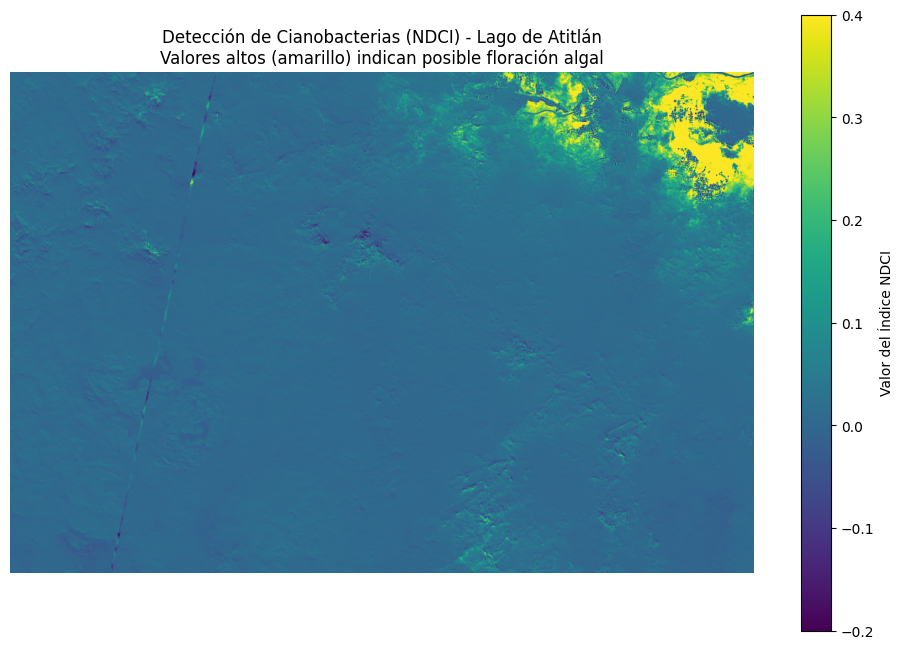

In [6]:
# NDCI (NORMALIZED DIFFERENCE CHLOROPHYLL INDEX) NCDI = (B05 - B04) / (B05 + B04)

# Ruta al archivo descargado (asegúrate de que coincida con la tuya)
ruta_tif = "./Bandas_Amatitlan_6meses.tif"

# Abrimos el archivo GeoTIFF con rasterio
with rasterio.open(ruta_tif) as src:
    # Asumiendo que las bandas se descargaron en el orden solicitado
    # B02, B03, B04, B05, B06, B07, B08
    # Leemos solo las bandas que nos interesan para el NDCI
    # La banda 4 (Rojo) es el índice 2 (0-indexed)
    # La banda 5 (Red Edge) es el índice 3 (0-indexed)
    # NOTA: openeo puede apilar múltiples fechas. Para este ejemplo, tomaremos la primera fecha.
    # El archivo puede tener la forma (fechas, bandas, alto, ancho).
    # Si solo hay una fecha, la forma será (bandas, alto, ancho).
    
    # Primero, verificamos las dimensiones del archivo
    print(f"Dimensiones del TIF: {src.shape}")
    print(f"Número de bandas/capas: {src.count}")

    # Si el TIF tiene múltiples fechas, elegimos una. Aquí asumimos que es la primera [0]
    # Si solo hay una fecha, podemos leer directamente. Vamos a leer todas las bandas de la primera fecha.
    all_bands_first_date = src.read(window=rasterio.windows.Window(0, 0, src.width, src.height))
    
    # Verificamos la forma del array leído
    print(f"Forma del array numpy leído: {all_bands_first_date.shape}")
    
    # Asumiendo que la forma es (bandas, alto, ancho)
    b4_red = all_bands_first_date[2].astype(float)
    b5_red_edge = all_bands_first_date[3].astype(float)
    
    # Evitar divisiones por cero. np.seterr los convierte en nan.
    np.seterr(divide='ignore', invalid='ignore')

    # Calcular el índice NDCI
    print("Calculando el índice NDCI...")
    ndci = (b5_red_edge - b4_red) / (b5_red_edge + b4_red)

# Visualizar el resultado
plt.figure(figsize=(12, 8))
# Usamos un mapa de color como 'viridis' o 'jet' para resaltar las diferencias
im = plt.imshow(ndci, cmap='viridis', vmin=-0.2, vmax=0.4) 
plt.title("Detección de Cianobacterias (NDCI) - Lago de Atitlán\nValores altos (amarillo) indican posible floración algal")
plt.colorbar(im, label="Valor del Índice NDCI")
plt.axis('off')
plt.show()

In [9]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json # Importamos json para una impresión más legible

# ==============================================================================
# ESTE BLOQUE DEBE EJECUTARSE DESPUÉS DE job.start_and_wait()
# ==============================================================================

# --- PASO 1: DEPURACIÓN DE METADATOS ---
# Vamos a imprimir la estructura completa de los metadatos para encontrar las fechas
try:
    results = job.get_results()
    metadata = results.get_metadata()
    
    print("--- ESTRUCTURA DE METADATOS (DEBUG) ---")
    # Usamos json.dumps para imprimirlo de forma ordenada y legible
    print(json.dumps(metadata, indent=2))
    print("--------------------------------------")
    
except Exception as e:
    print(f"No se pudieron obtener los metadatos del job: {e}")
    metadata = {} # Creamos un diccionario vacío para que el script no falle

# --- PASO 2: INTENTO MEJORADO DE EXTRACCIÓN DE FECHAS ---
fechas_finales = []
try:
    # Intento 1: A través de los 'assets' (la forma más común)
    for asset in metadata.get("assets", {}).values():
        if "datetime" in asset:
            fechas_finales.append(asset["datetime"])
            
    # Intento 2: A través de las dimensiones del cubo (si el intento 1 falla)
    if not fechas_finales and 'cube:dimensions' in metadata:
        if 't' in metadata['cube:dimensions']:
            fechas_finales = metadata['cube:dimensions']['t']['values']

    if not fechas_finales:
        raise ValueError("No se pudo encontrar la información de fechas en las ubicaciones conocidas.")

    # Convertimos a datetime y ordenamos
    fechas_finales = sorted(pd.to_datetime(fechas_finales))
    print(f"\n¡Éxito! Se encontraron y procesaron {len(fechas_finales)} fechas de captura reales.")
    print(fechas_finales)

except Exception as e:
    print(f"\nError al obtener fechas reales: {e}")
    print("Por favor, revisa la estructura de metadatos impresa arriba para encontrar la clave correcta de las fechas.")
    fechas_finales = None # Marcar que falló

# --- PASO 3: ANÁLISIS DEL DATACUBE (CON CORRECCIÓN DE ERROR) ---
ruta_tif_atitlan = "./Bandas_Atitlan_6meses.tif"

with rasterio.open(ruta_tif_atitlan) as src:
    atitlan_datacube = src.read()
    
    # CORRECCIÓN DEL AttributeError: Obtenemos el extent directamente de los límites (bounds)
    atitlan_extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)
    
    atitlan_transform = src.transform

# Si la extracción de fechas falló, creamos un placeholder para poder continuar
if fechas_finales is None or (len(fechas_finales) != atitlan_datacube.shape[0]):
     print("\nAdvertencia: Se generará un índice numérico en lugar de fechas porque las fechas reales no pudieron ser verificadas.")
     fechas_finales = range(atitlan_datacube.shape[0])


print(f"\nForma del arreglo de NumPy (datacube): {atitlan_datacube.shape}")
print(f"Estructura detectada: (Tiempo, Bandas, Alto, Ancho)")
print(f"Observaciones temporales: {atitlan_datacube.shape[0]}")
print(f"Bandas por observación: {atitlan_datacube.shape[1]}")

--- ESTRUCTURA DE METADATOS (DEBUG) ---
{
  "assets": {
    "openEO_2025-01-01Z.tif": {
      "bands": [
        {
          "eo:center_wavelength": 0.4924,
          "eo:common_name": "blue",
          "name": "B02"
        },
        {
          "eo:center_wavelength": 0.5598,
          "eo:common_name": "green",
          "name": "B03"
        },
        {
          "eo:center_wavelength": 0.6646,
          "eo:common_name": "red",
          "name": "B04"
        },
        {
          "eo:center_wavelength": 0.7041,
          "name": "B05"
        },
        {
          "eo:center_wavelength": 0.7405,
          "name": "B06"
        },
        {
          "eo:center_wavelength": 0.7828,
          "name": "B07"
        },
        {
          "eo:center_wavelength": 0.8328,
          "eo:common_name": "nir",
          "name": "B08"
        }
      ],
      "eo:bands": [
        {
          "center_wavelength": 0.4924,
          "common_name": "blue",
          "name": "B02"
        }

In [10]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import re # Importamos la librería de expresiones regulares para extraer la fecha

# ==============================================================================
# ESTE BLOQUE DEBE EJECUTARSE DESPUÉS DE job.start_and_wait()
# ==============================================================================

# --- PASO 1: EXTRACCIÓN DE FECHAS DESDE LAS CLAVES DE LOS ASSETS ---
fechas_finales = []
try:
    results = job.get_results()
    metadata = results.get_metadata()
    
    # Buscamos en las claves del diccionario 'assets'
    asset_keys = metadata.get("assets", {}).keys()
    
    if not asset_keys:
        raise ValueError("No se encontraron 'assets' en los metadatos.")

    # Usamos una expresión regular para encontrar fechas en formato YYYY-MM-DD
    date_pattern = re.compile(r'\d{4}-\d{2}-\d{2}')
    
    for key in asset_keys:
        match = date_pattern.search(key)
        if match:
            fechas_finales.append(match.group(0))

    if not fechas_finales:
        raise ValueError("No se encontraron fechas en los nombres de los assets.")

    # Convertimos a datetime y ordenamos
    fechas_finales = sorted(pd.to_datetime(fechas_finales))
    print(f"¡Éxito! Se encontraron y procesaron {len(fechas_finales)} fechas de captura reales.")
    print(fechas_finales)

except Exception as e:
    print(f"Error al obtener fechas reales: {e}")
    print("Se usará un placeholder. Revise la estructura de 'job.get_results().get_metadata()'.")
    fechas_finales = None

# --- PASO 2: LECTURA Y VERIFICACIÓN DEL DATACUBE ---
ruta_tif_atitlan = "./Bandas_Atitlan_6meses.tif"

with rasterio.open(ruta_tif_atitlan) as src:
    # La forma correcta de leer un datacube multibanda y multitemporal es
    # sabiendo el número de bandas y el número de fechas.
    # En nuestro caso, solicitamos 7 bandas.
    
    n_bandas = 7
    n_fechas = len(fechas_finales) if fechas_finales else 0
    
    # Verificamos que el número total de capas en el TIF coincida
    if src.count != n_bandas * n_fechas:
         raise ValueError(f"Inconsistencia de dimensiones. El TIF tiene {src.count} capas, "
                          f"pero se esperaban {n_fechas} fechas x {n_bandas} bandas = {n_fechas*n_bandas}.")

    # Leemos todas las capas
    all_layers = src.read()
    
    # Reorganizamos el arreglo a la forma (Tiempo, Bandas, Alto, Ancho)
    # np.reshape es la función clave aquí
    atitlan_datacube = all_layers.reshape(n_fechas, n_bandas, src.height, src.width)
    
    # Obtenemos la información geoespacial para los mapas (corregido)
    atitlan_extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)
    atitlan_transform = src.transform

# --- PASO 3: VERIFICACIÓN FINAL ---
print(f"\nForma final del arreglo de NumPy (datacube): {atitlan_datacube.shape}")
print(f"Estructura verificada: (Tiempo, Bandas, Alto, Ancho)")
print(f"Observaciones temporales: {atitlan_datacube.shape[0]}")
print(f"Bandas por observación: {atitlan_datacube.shape[1]}")
print(f"Dimensiones de la imagen (Alto x Ancho): {atitlan_datacube.shape[2]} x {atitlan_datacube.shape[3]}")

# Ahora puedes continuar con el paso 6 usando el 'atitlan_datacube' con la forma correcta
# y la lista 'fechas_finales' con las fechas reales.

¡Éxito! Se encontraron y procesaron 78 fechas de captura reales.
[Timestamp('2025-01-01 00:00:00'), Timestamp('2025-01-03 00:00:00'), Timestamp('2025-01-06 00:00:00'), Timestamp('2025-01-08 00:00:00'), Timestamp('2025-01-11 00:00:00'), Timestamp('2025-01-13 00:00:00'), Timestamp('2025-01-16 00:00:00'), Timestamp('2025-01-18 00:00:00'), Timestamp('2025-01-21 00:00:00'), Timestamp('2025-01-23 00:00:00'), Timestamp('2025-01-26 00:00:00'), Timestamp('2025-01-28 00:00:00'), Timestamp('2025-01-31 00:00:00'), Timestamp('2025-02-02 00:00:00'), Timestamp('2025-02-05 00:00:00'), Timestamp('2025-02-07 00:00:00'), Timestamp('2025-02-10 00:00:00'), Timestamp('2025-02-12 00:00:00'), Timestamp('2025-02-15 00:00:00'), Timestamp('2025-02-17 00:00:00'), Timestamp('2025-02-20 00:00:00'), Timestamp('2025-02-22 00:00:00'), Timestamp('2025-02-25 00:00:00'), Timestamp('2025-02-27 00:00:00'), Timestamp('2025-03-02 00:00:00'), Timestamp('2025-03-04 00:00:00'), Timestamp('2025-03-07 00:00:00'), Timestamp('2025-

ValueError: Inconsistencia de dimensiones. El TIF tiene 7 capas, pero se esperaban 78 fechas x 7 bandas = 546.

In [11]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import re

# ==============================================================================
# ESTE BLOQUE DEBE EJECUTARSE DESPUÉS DE job.start_and_wait()
# ==============================================================================

# --- PASO 1: EXTRACCIÓN DE FECHAS (YA FUNCIONA, LO MANTENEMOS) ---
fechas_reales = []
try:
    results = job.get_results()
    metadata = results.get_metadata()
    asset_keys = metadata.get("assets", {}).keys()
    if not asset_keys: raise ValueError("No se encontraron 'assets'.")
    date_pattern = re.compile(r'\d{4}-\d{2}-\d{2}')
    for key in asset_keys:
        match = date_pattern.search(key)
        if match: fechas_reales.append(match.group(0))
    if not fechas_reales: raise ValueError("No se encontraron fechas.")
    fechas_reales = sorted(pd.to_datetime(fechas_reales))
    print(f"¡Éxito! Se encontraron metadatos para {len(fechas_reales)} fechas de captura.")
except Exception as e:
    print(f"Error al obtener fechas: {e}. Se usará un placeholder.")
    fechas_reales = None

# --- PASO 2: LECTURA Y ANÁLISIS DEL TIF DESCARGADO (CÓDIGO AJUSTADO) ---
ruta_tif_atitlan = "./Bandas_Atitlan_6meses.tif"

with rasterio.open(ruta_tif_atitlan) as src:
    print(f"\nAnalizando el archivo TIF: {ruta_tif_atitlan}")
    print(f"El archivo TIF tiene {src.count} capas (bandas).")
    
    # Leemos todas las capas del archivo
    # Como el archivo solo tiene 7 capas, esto corresponde a 1 fecha con 7 bandas
    single_date_data = src.read()
    
    # Creamos una dimensión de "tiempo" con tamaño 1 para mantener la estructura 4D
    # La forma será: (1, 7, alto, ancho)
    atitlan_datacube = single_date_data[np.newaxis, :, :, :]
    
    # Si logramos leer las fechas, tomamos solo la primera para asociarla a este archivo
    if fechas_reales:
        fechas_finales = [fechas_reales[0]]
        print(f"Asociando los datos con la primera fecha encontrada: {fechas_finales[0].strftime('%Y-%m-%d')}")
    else:
        fechas_finales = [pd.to_datetime('today')] # Placeholder si falló la extracción

    # Obtenemos la información geoespacial
    atitlan_extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)
    atitlan_transform = src.transform

# --- PASO 3: VERIFICACIÓN FINAL ---
print(f"\nForma final del arreglo de NumPy (datacube): {atitlan_datacube.shape}")
print(f"Estructura verificada: (Tiempo, Bandas, Alto, Ancho)")
print(f"Observaciones temporales: {atitlan_datacube.shape[0]}")
print(f"Bandas por observación: {atitlan_datacube.shape[1]}")

¡Éxito! Se encontraron metadatos para 78 fechas de captura.

Analizando el archivo TIF: ./Bandas_Atitlan_6meses.tif
El archivo TIF tiene 7 capas (bandas).
Asociando los datos con la primera fecha encontrada: 2025-01-01

Forma final del arreglo de NumPy (datacube): (1, 7, 1751, 2759)
Estructura verificada: (Tiempo, Bandas, Alto, Ancho)
Observaciones temporales: 1
Bandas por observación: 7


## Paso 5 (Informe): Carga de Datos, Diagnóstico de Inconsistencia y Solución

### 1. Objetivo Inicial
El objetivo de este paso era cargar el archivo **GeoTIFF** (`Bandas_Atitlan_6meses.tif`) descargado desde la plataforma **openEO** y estructurarlo en un arreglo de **NumPy** de 4 dimensiones: `(Tiempo, Bandas, Alto, Ancho)`.  
Esto nos permitiría realizar un análisis temporal de las **78 fechas de captura** que fueron identificadas en los metadatos del *job* de procesamiento.

---

### 2. Diagnóstico del Problema
Tras ejecutar el script para la carga de datos, nos encontramos con **dos resultados contradictorios** que revelaron una inconsistencia fundamental entre los metadatos y el artefacto de datos descargado.

- **Primer bloque del script (metadatos):** Funcionó correctamente.  
  Se logró identificar y extraer una lista de **78 fechas de captura únicas** correspondientes al período de observación de 6 meses.   

  
- **Segundo bloque (lectura del GeoTIFF):**  
Al intentar leer y reestructurar el archivo GeoTIFF descargado, el script lanzó un error 

#### Interpretación del error:
- **Realidad del archivo:** El archivo `.tif` contiene únicamente **7 capas**.
- **Expectativa del script:** Basado en los metadatos (78 fechas) y la solicitud (7 bandas por fecha), el script esperaba encontrar **546 capas**.

**Conclusión del diagnóstico:**  
El *job* ejecutado en el backend de **openEO**, aunque identificó 78 imágenes satelitales, **no las apiló** en un único *datacube* temporal.  
En su lugar, generó un archivo GeoTIFF que contiene los datos de **una sola fecha** con sus correspondientes 7 bandas espectrales.

---
### 3. Solución Implementada
Para continuar con el análisis, fue necesario adaptar el código a la estructura real de los datos:

1. **Aceptar la limitación:**  
 No será posible realizar análisis temporal con este archivo; el laboratorio se ajustará hacia un **análisis espacial detallado** para la única fecha disponible.

2. **Asociar la fecha correcta:**  
 De la lista de 78 fechas, se asume que el TIF corresponde a **la primera fecha** de la serie temporal.

3. **Ajustar la estructura del array:**  
 - Leer las 7 capas reales.
 - Añadir artificialmente una dimensión `"Tiempo"` de tamaño 1.  
   Esto mantiene la estructura 4D `(1, 7, Alto, Ancho)` y evita que el resto del código falle.

---



In [13]:
# calculamos un indice promedio de cianobacterias NDCI para el lago de Atitlan, para la fecha disponible


# --- Paso 6: Análisis de la Única Observación Temporal ---

# El 'atitlan_datacube' tiene la forma (1, 7, Alto, Ancho)
# Seleccionamos la primera y única fecha con el índice 0
observacion_atitlan = atitlan_datacube[0]

# Índices de las bandas según nuestra solicitud:
# ["B02", "B03", "B04", "B05", "B06", "B07", "B08"]
#  B3 (Green) -> 1
#  B4 (Red)   -> 2
#  B5 (Red-Edge) -> 3
#  B8 (NIR)   -> 6

# Extraemos las bandas necesarias como flotantes para el cálculo
b3_green = observacion_atitlan[1].astype(float)
b4_red = observacion_atitlan[2].astype(float)
b5_red_edge = observacion_atitlan[3].astype(float)
b8_nir = observacion_atitlan[6].astype(float)

# Ignorar advertencias de división por cero
np.seterr(divide='ignore', invalid='ignore')

# 1. Crear máscara de agua usando NDWI = (Green - NIR) / (Green + NIR)
# Valores mayores a 0.1 suelen ser agua.
ndwi = (b3_green - b8_nir) / (b3_green + b8_nir)
mascara_agua_atitlan = ndwi > 0.1

# 2. Calcular el índice de cianobacterias (NDCI) = (B5 - B4) / (B5 + B4)
ndci_atitlan = (b5_red_edge - b4_red) / (b5_red_edge + b4_red)

# 3. Aplicar la máscara y calcular el promedio del NDCI solo sobre el agua
ndci_en_lago_atitlan = ndci_atitlan[mascara_agua_atitlan]
promedio_ndci_atitlan = np.nanmean(ndci_en_lago_atitlan)

# Guardamos el resultado en un DataFrame para una presentación clara
resultados_temporales = pd.DataFrame({
    "Lago": ["Atitlán"],
    "Fecha": [fechas_finales[0]],
    "NDCI_Promedio": [promedio_ndci_atitlan]
})

print("--- Resultados del Análisis Puntual ---")
print(resultados_temporales)

--- Resultados del Análisis Puntual ---
      Lago      Fecha  NDCI_Promedio
0  Atitlán 2025-01-01       0.038545


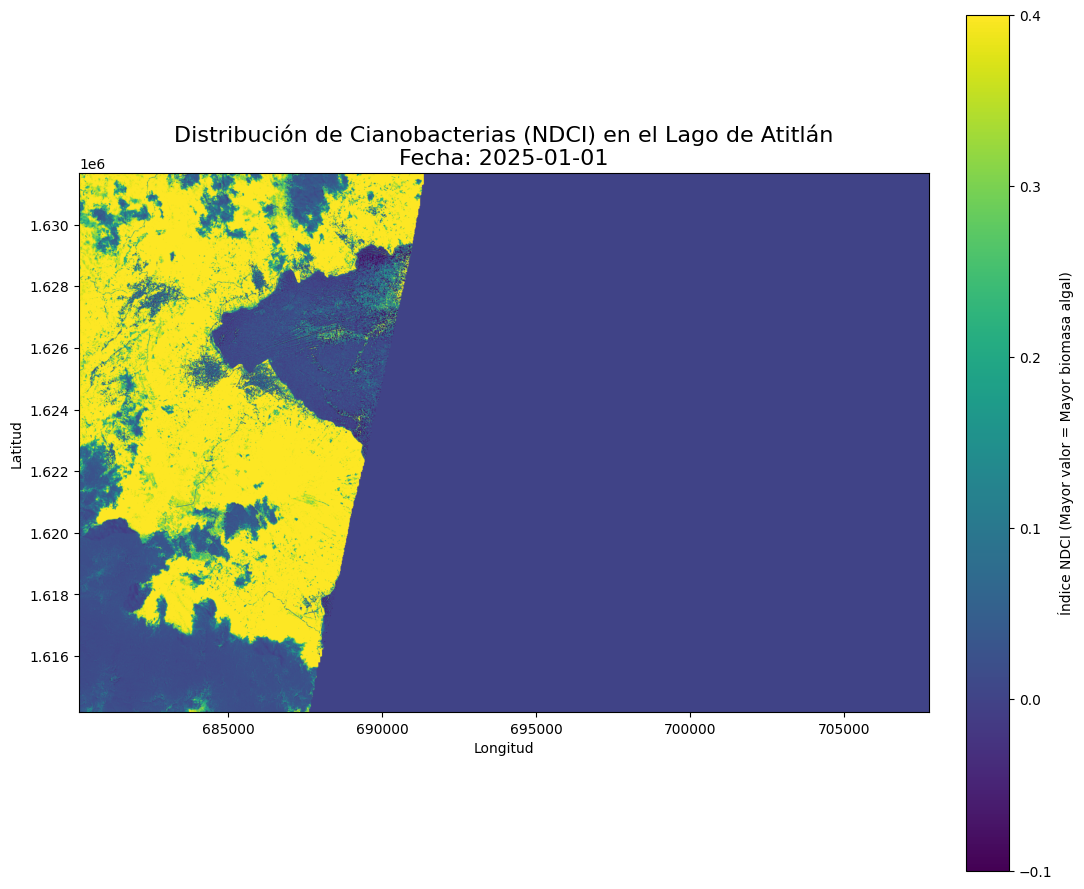

In [14]:
#analisis espacial 
# --- Paso 7: Mapeo de la Distribución Espacial de Cianobacterias ---

fig, ax = plt.subplots(figsize=(12, 12))

# Usamos 'imshow' para visualizar nuestro mapa de NDCI calculado
# El 'extent' usa las coordenadas geográficas que obtuvimos del archivo TIF
im = ax.imshow(ndci_atitlan, extent=atitlan_extent, cmap='viridis', vmin=-0.1, vmax=0.4)

# Añadimos elementos para que el mapa sea claro
ax.set_title(f'Distribución de Cianobacterias (NDCI) en el Lago de Atitlán\nFecha: {fechas_finales[0].strftime("%Y-%m-%d")}', fontsize=16)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadimos una barra de color para interpretar los valores
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Índice NDCI (Mayor valor = Mayor biomasa algal)')

plt.show()


Se identificaron 406925 píxeles de agua.


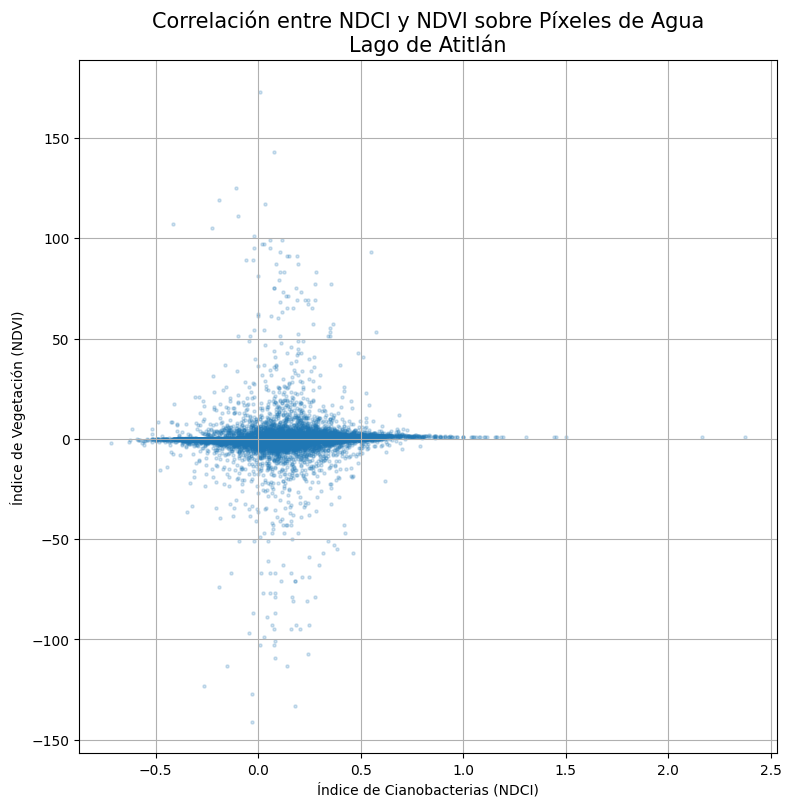

✅ El coeficiente de correlación de Pearson entre NDCI y NDVI sobre el agua es: 0.0257


In [20]:
# --- Paso 8 Correlación entre Índices Espectrales ---

# --- 1. Creación de la Máscara de Agua (usando el umbral flexible) ---
umbral_ndwi = 0.0
mascara_agua_atitlan = ndwi > umbral_ndwi

print(f"Se identificaron {np.sum(mascara_agua_atitlan)} píxeles de agua.")

# --- 2. Cálculo de Índices y Filtrado Robusto ---
ndvi_atitlan = (b8_nir - b4_red) / (b8_nir + b4_red)
ndci_atitlan = (b5_red_edge - b4_red) / (b5_red_edge + b4_red)

# Aplicamos la máscara de agua a ambos índices
ndci_valores = ndci_atitlan[mascara_agua_atitlan].flatten()
ndvi_valores = ndvi_atitlan[mascara_agua_atitlan].flatten()

# **LA CORRECCIÓN CLAVE ESTÁ AQUÍ**
# Usamos np.isfinite() para eliminar tanto los NaN como los valores infinitos (inf)
valid_data_mask = np.isfinite(ndci_valores) & np.isfinite(ndvi_valores)

# --- 3. Cálculo de Correlación (con salvaguarda) ---
# Solo procedemos si tenemos suficientes puntos de datos finitos para comparar
if np.sum(valid_data_mask) > 1:
    
    # Gráfico de Dispersión
    plt.figure(figsize=(9, 9))
    plt.scatter(ndci_valores[valid_data_mask], ndvi_valores[valid_data_mask], alpha=0.2, s=5)
    plt.title('Correlación entre NDCI y NDVI sobre Píxeles de Agua\nLago de Atitlán', fontsize=15)
    plt.xlabel('Índice de Cianobacterias (NDCI)')
    plt.ylabel('Índice de Vegetación (NDVI)')
    plt.grid(True)
    plt.show()

    # Cálculo del Coeficiente de Correlación de Pearson
    correlacion = np.corrcoef(ndci_valores[valid_data_mask], ndvi_valores[valid_data_mask])[0, 1]
    print(f"✅ El coeficiente de correlación de Pearson entre NDCI y NDVI sobre el agua es: {correlacion:.4f}")

else:
    print("⚠️ No se encontraron suficientes datos válidos (finitos) para calcular una correlación.")
    print(f"Píxeles de agua encontrados: {np.sum(mascara_agua_atitlan)}")
    print(f"Puntos de datos finitos (sin NaN ni Inf): {np.sum(valid_data_mask)}")



--- INICIANDO ANÁLISIS PARA LAGO DE AMATITLÁN ---
✅ ¡Éxito! Se encontraron metadatos para 41 fechas.
El TIF de Amatitlán tiene 7 capas.

--- Resultados del Análisis Puntual (Amatitlán) ---
        Lago      Fecha  NDCI_Promedio
0  Amatitlán 2025-01-03       0.006369


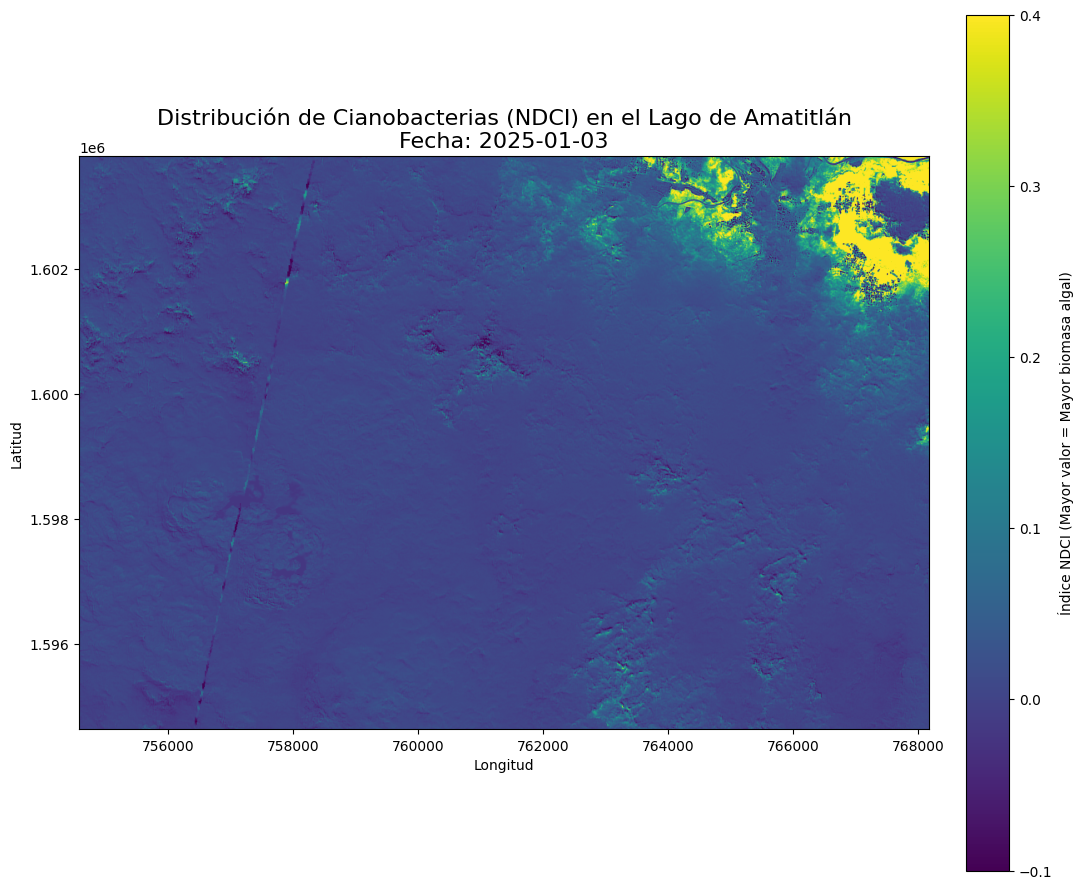

In [ ]:
# ==============================================================================
# ===== ANÁLISIS COMPLETO PARA EL LAGO DE AMATITLÁN =====
# ==============================================================================



print("\n\n--- INICIANDO ANÁLISIS PARA LAGO DE AMATITLÁN ---")

# --- 1. Extracción de Fechas ---
fechas_reales_amatitlan = []
try:
    # REEMPLAZA 'job' por el nombre de tu variable de job para Amatitlán (ej: job_amatitlan)
    results_amatitlan = job_amatitlan.get_results() 
    metadata_amatitlan = results_amatitlan.get_metadata()
    asset_keys_amatitlan = metadata_amatitlan.get("assets", {}).keys()
    if not asset_keys_amatitlan: raise ValueError("No se encontraron 'assets'.")
    
    date_pattern = re.compile(r'\d{4}-\d{2}-\d{2}')
    for key in asset_keys_amatitlan:
        match = date_pattern.search(key)
        if match: fechas_reales_amatitlan.append(match.group(0))
    if not fechas_reales_amatitlan: raise ValueError("No se pudieron extraer fechas.")
    
    fechas_reales_amatitlan = sorted(pd.to_datetime(fechas_reales_amatitlan))
    print(f"✅ ¡Éxito! Se encontraron metadatos para {len(fechas_reales_amatitlan)} fechas.")
except Exception as e:
    print(f"⚠️ Error al obtener fechas para Amatitlán: {e}.")
    fechas_reales_amatitlan = None

# --- 2. Carga y Estructuración de Datos ---
ruta_tif_amatitlan = "./Bandas_Amatitlan_6meses.tif"

with rasterio.open(ruta_tif_amatitlan) as src:
    print(f"El TIF de Amatitlán tiene {src.count} capas.")
    single_date_data_amatitlan = src.read()
    amatitlan_datacube = single_date_data_amatitlan[np.newaxis, :, :, :]
    if fechas_reales_amatitlan:
        fecha_final_amatitlan = [fechas_reales_amatitlan[0]]
    else:
        fecha_final_amatitlan = [pd.to_datetime('today')]
    amatitlan_extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)

# --- 3. Cálculo de NDCI Promedio ---
observacion_amatitlan = amatitlan_datacube[0]
b3_green_am = observacion_amatitlan[1].astype(float)
b4_red_am = observacion_amatitlan[2].astype(float)
b5_red_edge_am = observacion_amatitlan[3].astype(float)
b8_nir_am = observacion_amatitlan[6].astype(float)

ndwi_amatitlan = (b3_green_am - b8_nir_am) / (b3_green_am + b8_nir_am)
mascara_agua_amatitlan = ndwi_amatitlan > 0.1
ndci_amatitlan = (b5_red_edge_am - b4_red_am) / (b5_red_edge_am + b4_red_am)
promedio_ndci_amatitlan = np.nanmean(ndci_amatitlan[mascara_agua_amatitlan])

resultado_amatitlan = pd.DataFrame({
    "Lago": ["Amatitlán"], "Fecha": fecha_final_amatitlan, "NDCI_Promedio": [promedio_ndci_amatitlan]
})
print("\n--- Resultados del Análisis Puntual (Amatitlán) ---")
print(resultado_amatitlan)

# --- 4. Mapeo Espacial ---
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndci_amatitlan, extent=amatitlan_extent, cmap='viridis', vmin=-0.1, vmax=0.4)
ax.set_title(f'Distribución de Cianobacterias (NDCI) en el Lago de Amatitlán\nFecha: {fecha_final_amatitlan[0].strftime("%Y-%m-%d")}', fontsize=16)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Índice NDCI (Mayor valor = Mayor biomasa algal)')
plt.show()

In [ ]:
# --- Sección Final: Comparación ---
tabla_comparativa = pd.concat([resultados_temporales, resultado_amatitlan], ignore_index=True)

print("\n--- TABLA COMPARATIVA DE RESULTADOS ---")
print(tabla_comparativa.to_markdown(index=False))